# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
import requests
import random
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress


## Generate Cities List

In [5]:
#Setting up initial lists for pull + # of requests
city_list = []
pullsize = 1000

# Generating random Lat/Long coordinates to populate cities into list
for x in range(0,pullsize):
    coord1 = np.random.uniform(low=-90.000000, high=90.000000)
    coord2 = np.random.uniform(low=-180.000000, high=180.000000)
    city = citipy.nearest_city(coord1, coord2)
    city_list.append(city.city_name)  

In [6]:
# Setting up initial DataFrame
Collected_df = pd.DataFrame(columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
Collected_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#counter to work with results call
counter = 0

# iterating within generated list, pulling from WeatherAPI
for city_list in city_list:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + str(city_list)
        pulloutput = requests.get(query_url).json()
        newrow = {"City": pulloutput["name"],
                 "Lat": pulloutput["coord"]["lat"],
                 "Lng": pulloutput["coord"]["lon"],
                 "Max Temp": pulloutput["main"]["temp_max"],
                 "Humidity": pulloutput["main"]["humidity"],
                 "Cloudiness": pulloutput['clouds']['all'],
                 "Wind Speed": pulloutput['wind']['speed'],
                 "Country": pulloutput["sys"]["country"],
                 "Date": str(pulloutput["dt"]),
                 }
        Collected_df = Collected_df.append(newrow, ignore_index=True)
        counter += 1
        #outputing results
        print(f"Processing Record {counter} of Set 1 | {city_list}")
    except KeyError:
        print(f"City not found. Skipping...")
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | bluff
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
City not found. Skipping...
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | yavatmal
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | yulara
Processing Record 11 of Set 1 | reserva
Processing Record 12 of Set 1 | jamestown
City not found. Skipping...
Processing Record 13 of Set 1 | baruun-urt
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | lompoc
City not found. Skipping...
Processing Record 17 of Set 1 | neuquen
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | bakchar
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | busselton
C

Processing Record 181 of Set 1 | poum
Processing Record 182 of Set 1 | hobart
Processing Record 183 of Set 1 | mataura
Processing Record 184 of Set 1 | opuwo
Processing Record 185 of Set 1 | rikitea
Processing Record 186 of Set 1 | cape town
City not found. Skipping...
Processing Record 187 of Set 1 | luderitz
Processing Record 188 of Set 1 | port alfred
Processing Record 189 of Set 1 | saint anthony
Processing Record 190 of Set 1 | avarua
Processing Record 191 of Set 1 | chancay
Processing Record 192 of Set 1 | mataura
Processing Record 193 of Set 1 | hermanus
Processing Record 194 of Set 1 | port blair
City not found. Skipping...
Processing Record 195 of Set 1 | mahebourg
Processing Record 196 of Set 1 | hithadhoo
Processing Record 197 of Set 1 | bani
City not found. Skipping...
Processing Record 198 of Set 1 | nanortalik
City not found. Skipping...
Processing Record 199 of Set 1 | narsaq
Processing Record 200 of Set 1 | barrow
Processing Record 201 of Set 1 | meulaboh
Processing Rec

Processing Record 364 of Set 1 | norman wells
Processing Record 365 of Set 1 | los llanos de aridane
Processing Record 366 of Set 1 | methoni
Processing Record 367 of Set 1 | mayo
Processing Record 368 of Set 1 | key west
Processing Record 369 of Set 1 | carbonia
Processing Record 370 of Set 1 | bethel
City not found. Skipping...
Processing Record 371 of Set 1 | jamestown
Processing Record 372 of Set 1 | torrington
Processing Record 373 of Set 1 | weyburn
Processing Record 374 of Set 1 | mataura
Processing Record 375 of Set 1 | barrow
Processing Record 376 of Set 1 | arraial do cabo
Processing Record 377 of Set 1 | pisco
Processing Record 378 of Set 1 | champerico
Processing Record 379 of Set 1 | thompson
Processing Record 380 of Set 1 | tasiilaq
Processing Record 381 of Set 1 | gora
Processing Record 382 of Set 1 | punta arenas
Processing Record 383 of Set 1 | punta arenas
Processing Record 384 of Set 1 | pevek
Processing Record 385 of Set 1 | carutapera
Processing Record 386 of Set 1

Processing Record 546 of Set 1 | albany
Processing Record 547 of Set 1 | albany
Processing Record 548 of Set 1 | talnakh
Processing Record 549 of Set 1 | kiboga
Processing Record 550 of Set 1 | rikitea
Processing Record 551 of Set 1 | santa maria
Processing Record 552 of Set 1 | lompoc
Processing Record 553 of Set 1 | prince rupert
Processing Record 554 of Set 1 | cape town
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 555 of Set 1 | atuona
Processing Record 556 of Set 1 | mar del plata
Processing Record 557 of Set 1 | tiznit
Processing Record 558 of Set 1 | cape town
Processing Record 559 of Set 1 | kaitangata
Processing Record 560 of Set 1 | coihaique
Processing Record 561 of Set 1 | ekibastuz
Processing Record 562 of Set 1 | kapaa
Processing Record 563 of Set 1 | armidale
Processing Record 564 of Set 1 | saldanha
Processing Record 565 of Set 1 | pyshma
Processing Record 566 of Set 1 | waipawa
Processing Record 567 of Set 1 | th

Processing Record 730 of Set 1 | albany
Processing Record 731 of Set 1 | cabedelo
Processing Record 732 of Set 1 | qaanaaq
Processing Record 733 of Set 1 | cidreira
Processing Record 734 of Set 1 | longyearbyen
Processing Record 735 of Set 1 | busselton
Processing Record 736 of Set 1 | nikolskoye
Processing Record 737 of Set 1 | hermanus
Processing Record 738 of Set 1 | saint george
Processing Record 739 of Set 1 | bakchar
Processing Record 740 of Set 1 | abu kamal
Processing Record 741 of Set 1 | hermanus
Processing Record 742 of Set 1 | nantucket
Processing Record 743 of Set 1 | port alfred
City not found. Skipping...
Processing Record 744 of Set 1 | cape town
Processing Record 745 of Set 1 | kapaa
Processing Record 746 of Set 1 | katsuura
City not found. Skipping...
Processing Record 747 of Set 1 | rikitea
Processing Record 748 of Set 1 | soyo
Processing Record 749 of Set 1 | faanui
Processing Record 750 of Set 1 | whitehorse
Processing Record 751 of Set 1 | flinders
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#removing duplicates and exporting the rest to csv
Collected_df = Collected_df.drop_duplicates()
Collected_df["Max Temp"] = ((Collected_df["Max Temp"] - 273.15) * 9/5 + 32) #converting Kelvin to Fahrenheit
Collected_df.to_csv(r'exports\CityList.csv')
Collected_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,62.600,67,20,2.10,PT,1600323578
1,Bluff,-46.60,168.33,46.004,70,88,6.26,NZ,1600323328
2,Mataura,-46.19,168.86,46.004,70,100,6.26,NZ,1600323578
3,Nikolskoye,59.70,30.79,51.800,76,75,3.00,RU,1600323579
4,Pevek,69.70,170.31,35.348,96,100,6.25,RU,1600323579


In [9]:
Collected_df.shape

(410, 9)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
Collected_df2 =Collected_df[Collected_df["Humidity"] <= 100]

In [13]:
Collected_df2.shape

if Collected_df.shape == Collected_df2.shape:
    print("No cities were removed due from errors in humidity.")

No cities were removed due to error in humidity.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

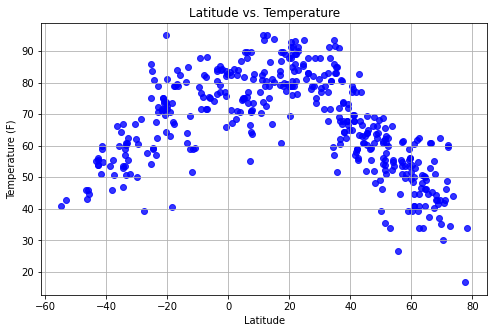

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.title('Latitude vs. Temperature')
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_temperature_all.png')

## Latitude vs. Humidity Plot

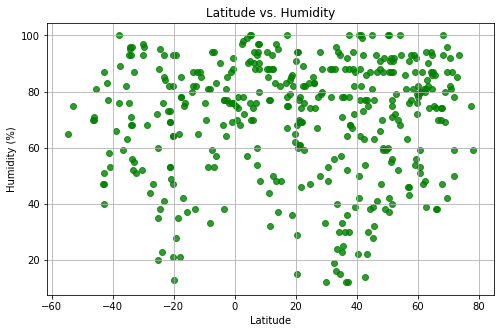

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Humidity"]), marker="o", facecolors="green", alpha=0.8)
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_humidity_all.png')

## Latitude vs. Cloudiness Plot

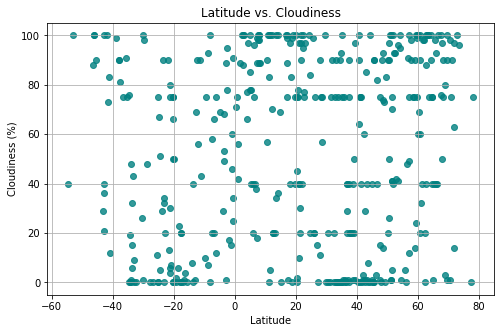

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Cloudiness"]), marker="o", facecolors="teal", alpha=0.8)
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_cloudiness_all.png')

## Latitude vs. Wind Speed Plot

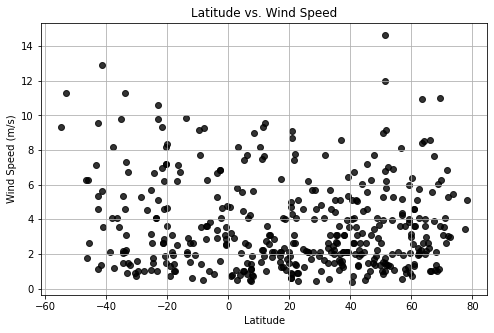

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Wind Speed"]), marker="o", facecolors="black", alpha=0.8)
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_windspeed_all.png')

## Linear Regression

In [18]:
# Splitting the dataset into North and Southern hemispheres for analysis
NorthHem_df=Collected_df2[Collected_df2["Lat"]>=0]
SouthHem_df=Collected_df2[Collected_df2["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is -0.79


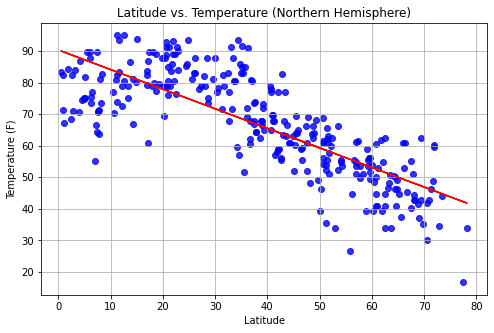

In [20]:
#correlation calculation
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Max Temp"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Max Temp"]))
regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Temperature (Northern Hemisphere)')
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_temperature_north.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is 0.74


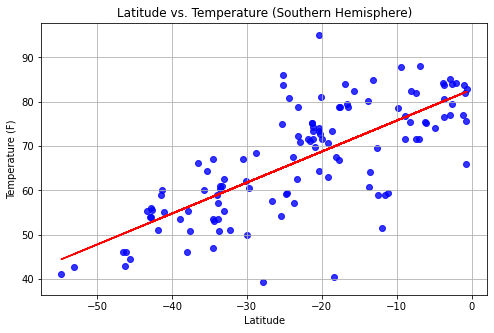

In [21]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Max Temp"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Max Temp"]))
regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Temperature (Southern Hemisphere)')
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_temperature_south.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is -0.04


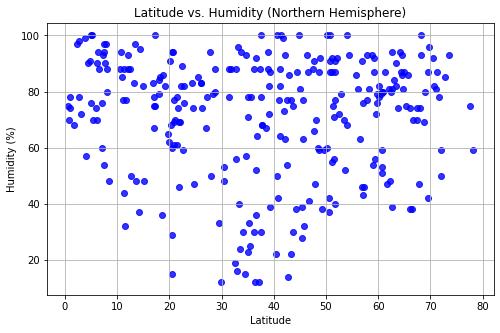

In [22]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Humidity"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

#slope, intercept = linregress((NorthHem_df["Lat"]),(NorthHem_df["Humidity"]))
#regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Humidity"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Humidity (Northern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_humidity_north.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is 0.05


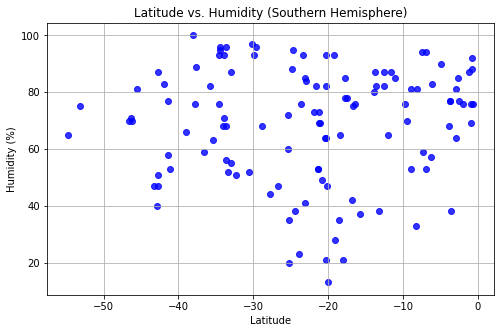

In [23]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Humidity"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

#slope, intercept, r_value, p_value, std_err = linregress((SouthHem_df["Lat"]),(SouthHem_df["Humidity"])) 
#regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Humidity"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Humidity (Southern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_humidity_south.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is -0.04


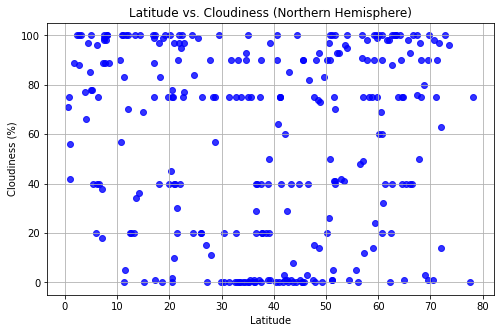

In [24]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Cloudiness"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


#slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Cloudiness"]))
#regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Cloudiness"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness (Northern Hemisphere)')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_cloudiness_north.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is -0.14


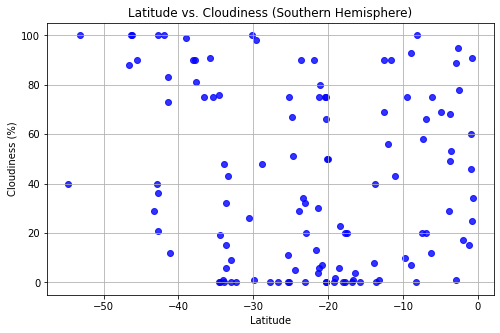

In [25]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Cloudiness"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


#slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Cloudiness"]))
#regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Cloudiness"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness (Southern Hemisphere)')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_cloudiness_south.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is 0.11


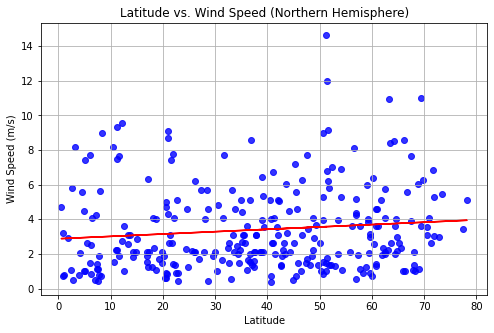

In [26]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Wind Speed"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Wind Speed"]))
regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Wind Speed"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_windspeed_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is -0.16


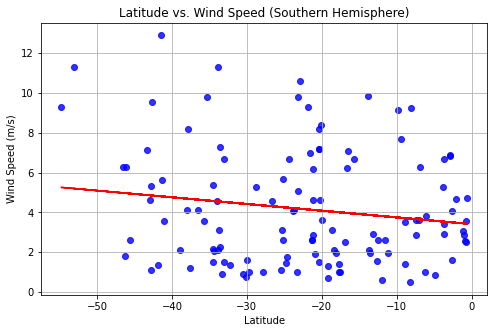

In [27]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Wind Speed"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Wind Speed"]))
regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Wind Speed"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_windspeed_south.png')